In [ ]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
from fbprophet import Prophet
import google.colab as colab



Question 9. You have some stock (S&P) data from here for five years until February 2018 and want to make prediction model for Facebook stocks. You need FB_data.csv file - it's committed to the course repo as well.

Split the data into training and test sets. Everything before 01.09.2017 (pd.datetime(2017, 9, 1)) would form a training set. The rest would be a test set.
  Train the Prophet() model with default parameters
  Measure MAPE (mean average percentage error) for the test set

What test set MAPE do you get (approx.)?
*   2.5%
*  3.5%
*   4.5%
*   5.5%

In [ ]:
!wget https://raw.githubusercontent.com/Yorko/mlcourse.ai/master/data/FB_data.csv

--2019-11-09 13:04:18--  https://raw.githubusercontent.com/Yorko/mlcourse.ai/master/data/FB_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 61168 (60K) [text/plain]
Saving to: ‘FB_data.csv’

FB_data.csv         100%[===================>]  59.73K  --.-KB/s    in 0.004s  

2019-11-09 13:04:19 (14.2 MB/s) - ‘FB_data.csv’ saved [61168/61168]



In [ ]:
!pip list | grep prophet

fbprophet                0.5        


In [ ]:
df = pd.read_csv('FB_data.csv')
df = df[['date', 'close']].reset_index(drop=True)
df = df.rename({'close':'y', 'date':'ds'}, axis='columns')
df['ds'] = pd.to_datetime(df['ds'])

[]

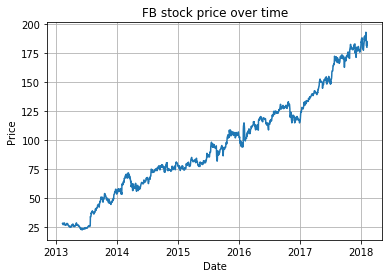

In [ ]:
plt.plot(df["ds"],df['y'])
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("FB stock price over time")
plt.grid()
plt.plot()

In [ ]:
df[df['ds']=="2017-09-01"]

,ds,y
1150,2017-09-01,172.02


In [ ]:
df_train = df.iloc[:1150]
df_test = df.iloc[1150:]

In [ ]:
df_test

,ds,y
1150,2017-09-01,172.02
1151,2017-09-05,170.72
1152,2017-09-06,172.09
1153,2017-09-07,173.21
1154,2017-09-08,170.95
...,...,...
1254,2018-02-01,193.09
1255,2018-02-02,190.28
1256,2018-02-05,181.26
1257,2018-02-06,185.31


In [ ]:
proph = Prophet()

In [ ]:
proph.fit(df_train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
pred = proph.predict(df_test)

In [ ]:
pred

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2017-09-01,164.286933,165.701484,173.587407,164.286933,164.286933,5.408044,5.408044,5.408044,0.212654,0.212654,0.212654,5.195390,5.195390,5.195390,0.0,0.0,0.0,169.694976
1,2017-09-05,164.837976,167.343524,175.043740,164.837976,164.837976,6.187064,6.187064,6.187064,0.135644,0.135644,0.135644,6.051419,6.051419,6.051419,0.0,0.0,0.0,171.025039
2,2017-09-06,164.975736,167.779716,175.439812,164.975736,164.975736,6.540504,6.540504,6.540504,0.267080,0.267080,0.267080,6.273424,6.273424,6.273424,0.0,0.0,0.0,171.516241
3,2017-09-07,165.113497,168.037299,175.833608,165.113497,165.113497,6.770946,6.770946,6.770946,0.281264,0.281264,0.281264,6.489682,6.489682,6.489682,0.0,0.0,0.0,171.884443
4,2017-09-08,165.251258,168.213128,176.029187,165.251258,165.251258,6.908610,6.908610,6.908610,0.212654,0.212654,0.212654,6.695957,6.695957,6.695957,0.0,0.0,0.0,172.159868
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,2018-02-01,185.364328,170.606521,191.926222,175.930173,195.959577,-4.122574,-4.122574,-4.122574,0.281264,0.281264,0.281264,-4.403839,-4.403839,-4.403839,0.0,0.0,0.0,181.241754
105,2018-02-02,185.502089,170.791670,193.013878,175.934480,196.251083,-4.032223,-4.032223,-4.032223,0.212654,0.212654,0.212654,-4.244876,-4.244876,-4.244876,0.0,0.0,0.0,181.469866
106,2018-02-05,185.915371,171.413748,193.766494,175.947399,196.939430,-3.656519,-3.656519,-3.656519,0.144759,0.144759,0.144759,-3.801278,-3.801278,-3.801278,0.0,0.0,0.0,182.258852
107,2018-02-06,186.053132,171.177071,195.009175,175.951705,197.244649,-3.531846,-3.531846,-3.531846,0.135644,0.135644,0.135644,-3.667490,-3.667490,-3.667490,0.0,0.0,0.0,182.521286


In [ ]:
def mape(y_pred,y_true):
  return 100*np.mean(np.abs(y_pred-y_true)/y_true)

In [ ]:
mape(np.array(pred['yhat']),np.array(df_test['y']))

2.454142503900619

[]

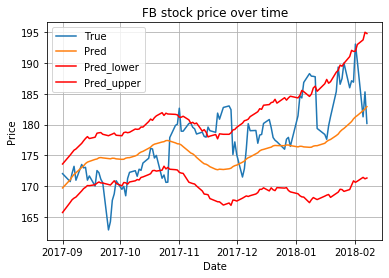

In [ ]:
plt.plot(df_test['ds'],df_test['y'],label='True')
plt.plot(df_test['ds'],pred['yhat'],label='Pred')
plt.plot(df_test['ds'],pred['yhat_lower'],label='Pred_lower',color='red')
plt.plot(df_test['ds'],pred['yhat_upper'],label='Pred_upper',color='red')
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("FB stock price over time")
plt.grid()
plt.legend()
plt.plot()

In [ ]:
full_pred = proph.predict(df)

[]

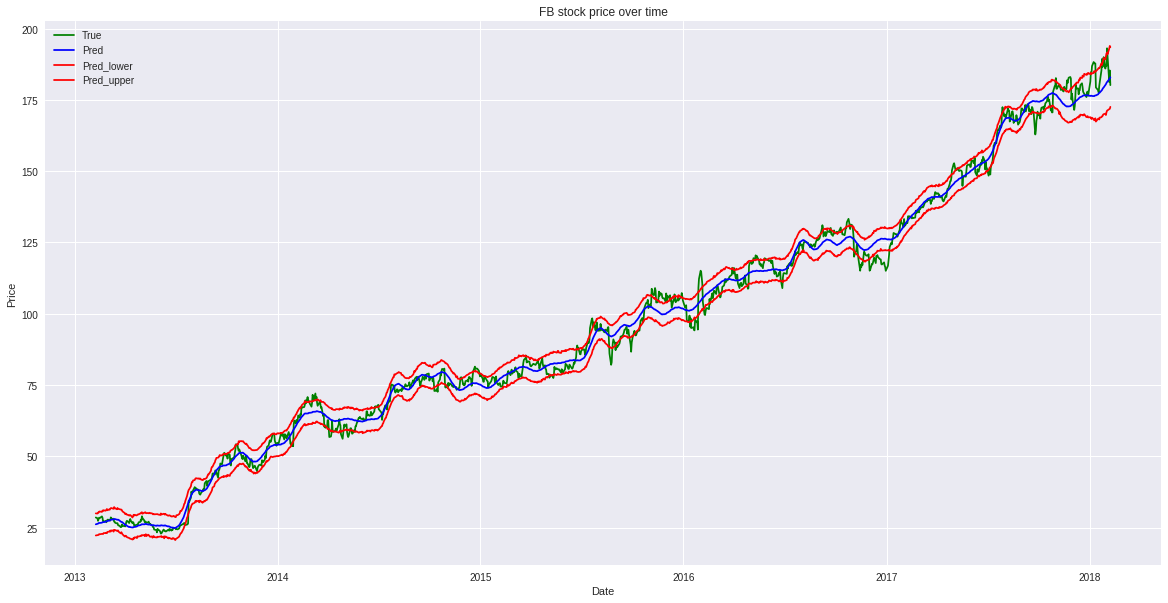

In [ ]:
plt.style.use('seaborn-dark')
plt.figure(figsize=(20,10))
plt.plot(df['ds'],df['y'],label='True',color="green")
plt.plot(df['ds'],full_pred['yhat'],label='Pred',color="blue")
plt.plot(df['ds'],full_pred['yhat_lower'],label='Pred_lower',color='red')
plt.plot(df['ds'],full_pred['yhat_upper'],label='Pred_upper',color='red')
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("FB stock price over time")
plt.grid()
plt.legend()
plt.plot()